In [17]:
from utils_stream import *

In [ ]:
# # Определение порога для определения аномалий (например, в 1.5 раза больше медианы)
# threshold = 1.1

# # Вычисление медианы для предыдущих значений
# median_anomal = df['anomal'].rolling(window=3).median().shift(1)
# print(median_anomal)

# # Проверка аномалий
# df['is_anomaly'] = df['anomal'] > threshold * median_anomal

In [86]:
def read_results_from_excel(path: str, cut_cpgt: bool) -> pd.DataFrame:
    res_df = pd.read_excel(path)

    if res_df.columns[0] == 'Unnamed: 0':
        res_df.columns = [None] + list(res_df.columns[1:])
        res_df.set_index(res_df.columns[0], inplace=True)

    # res_df = res_df[res_df['cp'] != 0]
    
    cpgt_df = pd.DataFrame()

    if cut_cpgt:
        for col in ('cp', 'gt'):
            if col in res_df.columns:
                cpgt_df = pd.concat([cpgt_df, res_df[col]], axis=1)
                res_df = res_df.drop(columns=[col])
    
    return res_df, cpgt_df

In [267]:
def split_results(df: pd.DataFrame, drop_0: bool) -> List[pd.DataFrame]:
    df_tmp = df.copy()
    df_tmp.index = df_tmp.index.map(str_to_time)

    step = df_tmp.index[1] - df_tmp.index[0]
    split_indices = df_tmp.index[df_tmp['cp'].diff().fillna(0) != 0].tolist() + [len(df_tmp) * step]

    parts_df = []
    start_index = 0

    for end_index in split_indices:
        part_df = df_tmp.loc[start_index:end_index - step]
        part_df.index = part_df.index.map(time_to_str)

        start_index = end_index

        if drop_0 and part_df['cp'].eq(0).all():
            continue
        parts_df.append(part_df)
    
    return parts_df

In [272]:
res_dir = 'results'
folder = 'Arson'
tables = os.listdir(f'{res_dir}/{folder}')
print(tables)

['Arson001_x264_10fps_124td.xlsx', 'Arson002_x264_10fps_124td.xlsx', 'Arson003_x264_10fps_124td.xlsx', 'Arson005_x264_10fps_124td.xlsx', 'Arson006_x264_10fps_124td.xlsx', 'Arson007_x264_10fps_124td.xlsx', 'Arson008_x264_10fps_124td.xlsx', 'Arson009_x264_10fps_124td.xlsx', 'Arson010_x264_10fps_124td.xlsx', 'Arson011_x264_10fps_124td.xlsx', 'Arson012_x264_10fps_124td.xlsx', 'Arson013_x264_10fps_124td.xlsx', 'Arson014_x264_10fps_124td.xlsx', 'Arson015_x264_10fps_124td.xlsx', '~$Arson001_x264_10fps_124td.xlsx']


In [ ]:
res_path = f'{res_dir}/{folder}/{tables[0]}'
res_df, cpgt_df = read_results_from_excel(res_path, False)

In [113]:
cpgt_df

""


In [114]:
res_df

,cp,gt,an arson,a torching,an incendiarism,a firebombing,a burning,a fire,a wildfire,a blaze,...,a truck crashing into people,a truck crashing into the wall,a truck crashing into the fence,a vandalism,a man drawing on the wall,a man drawing on the car,a man breaking down a car,a man breaking a furniture,a man throwing stones,"a pizza, a type of food"
00:00.000,0,0,0.243939,0.253616,0.247966,0.234902,0.244458,0.235017,0.231201,0.246143,...,0.220980,0.214757,0.198723,0.236464,0.233233,0.216157,0.206577,0.224702,0.234447,0.246203
00:00.100,0,0,0.243939,0.253616,0.247966,0.234902,0.244458,0.235017,0.231201,0.246143,...,0.220980,0.214757,0.198723,0.236464,0.233233,0.216157,0.206577,0.224702,0.234447,0.246203
00:00.200,0,0,0.203330,0.209278,0.198394,0.199951,0.193469,0.187279,0.166617,0.207759,...,0.190626,0.189321,0.186415,0.203204,0.172789,0.174460,0.175567,0.164371,0.155509,0.156308
00:00.300,0,0,0.206743,0.214625,0.216667,0.206243,0.197662,0.188767,0.169074,0.206719,...,0.196539,0.186936,0.184216,0.215780,0.175387,0.177072,0.185490,0.171693,0.168266,0.166389
00:00.400,0,0,0.203888,0.210851,0.233989,0.218899,0.193373,0.190949,0.174802,0.203236,...,0.196947,0.182987,0.188070,0.215382,0.165128,0.172328,0.181493,0.164964,0.166396,0.161970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02:19.100,0,0,0.192343,0.161761,0.174135,0.191531,0.170930,0.163441,0.147867,0.193410,...,0.173323,0.159925,0.163896,0.186460,0.132398,0.146483,0.148681,0.147153,0.142728,0.147263
02:19.200,0,0,0.193525,0.167596,0.179468,0.193753,0.173797,0.166441,0.154474,0.186182,...,0.171862,0.163890,0.173130,0.193969,0.139230,0.146317,0.151337,0.150047,0.146079,0.145585
02:19.300,0,0,0.196944,0.172736,0.185330,0.191500,0.178813,0.172491,0.161751,0.186768,...,0.181392,0.172552,0.183080,0.191255,0.144521,0.149688,0.154901,0.154007,0.148748,0.147453
02:19.400,0,0,0.201606,0.193880,0.198810,0.204871,0.187136,0.179149,0.161588,0.193613,...,0.183740,0.171490,0.169534,0.206085,0.161275,0.167358,0.167616,0.158908,0.157621,0.157825


In [268]:
parts_res_df = split_results(res_df, True)

In [269]:
len(parts_res_df)

4

In [261]:
def plot_results(df: pd.DataFrame, xticks: int) -> None:
    fig, axs = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [4, 1]})
    fig.subplots_adjust(hspace=0.1)

    axs[0].plot(df.index, df[df.columns[2]])
    axs[0].set_xticks(df.index[::xticks])
    axs[0].tick_params(axis='x', rotation=90)
    axs[0].set_xticklabels([''] * len(df.index[::xticks]))
    axs[0].grid(True)

    axs[1].plot(df.index, df['gt'])
    axs[1].set_xticks(df.index[::xticks])
    axs[1].tick_params(axis='x', rotation=90)
    axs[1].grid(True)



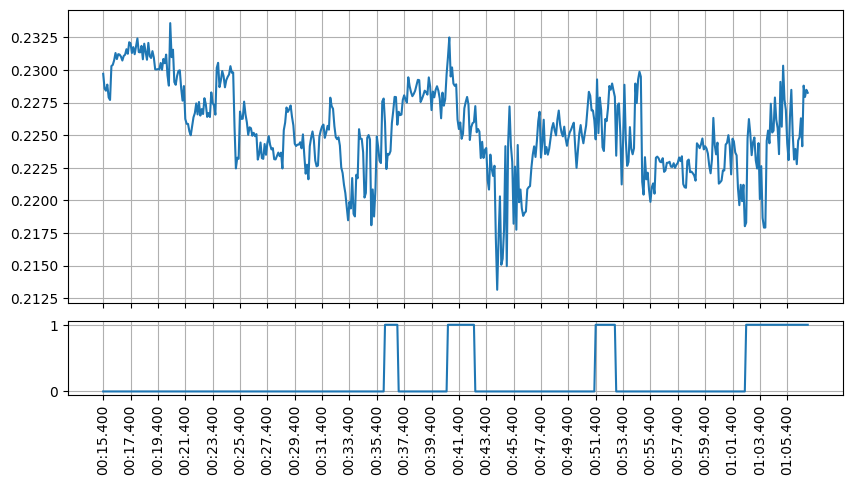

In [271]:
plot_results(parts_res_df[0], 20)

In [69]:
# Функция для получения наибольших значений и их индексов в каждой строке
def get_top_values(row, n=5):
    top_values = row.nlargest(n)
    print(top_values)
    labels = top_values.index.tolist()
    values = top_values.values.tolist()
    # for item in top_values.items():
    #     print(item)
    return labels, values

# Применение функции к каждой строке DataFrame
top_predictions = res_df.apply(lambda row: get_top_values(row, n=2), axis=1)

# Создание нового DataFrame для хранения результатов
result_df = pd.DataFrame(top_predictions.tolist(), columns=['top_labels', 'top_values'], index=res_df.index)

# print(result_df)

a burning door        0.294327
a gas station fire    0.289479
Name: 00:00.000, dtype: float64
a burning door        0.294706
a gas station fire    0.289884
Name: 00:00.080, dtype: float64
a burning door        0.291805
a gas station fire    0.287084
Name: 00:00.160, dtype: float64
a burning door    0.290502
an explosion      0.286498
Name: 00:00.240, dtype: float64
a burning door    0.290979
an explosion      0.287071
Name: 00:00.320, dtype: float64
a burning door    0.296475
an explosion      0.292255
Name: 00:00.400, dtype: float64
a burning door    0.296459
an explosion      0.292047
Name: 00:00.480, dtype: float64
a burning door    0.295897
an explosion      0.291890
Name: 00:00.559, dtype: float64
a burning door    0.295162
an explosion      0.291279
Name: 00:00.639, dtype: float64
a burning door    0.294929
an explosion      0.290654
Name: 00:00.719, dtype: float64
a burning door    0.295298
an explosion      0.291116
Name: 00:00.799, dtype: float64
a burning door    0.296149
an 

In [66]:
result_df[:20]

,top_labels,top_values
00:00.000,[a burning door],[0.2943266034126282]
00:00.080,[a burning door],[0.2947055101394653]
00:00.160,[a burning door],[0.2918048799037933]
00:00.240,[a burning door],[0.29050213098526]
00:00.320,[a burning door],[0.2909789681434631]
00:00.400,[a burning door],[0.2964753806591034]
00:00.480,[a burning door],[0.2964589595794678]
00:00.559,[a burning door],[0.2958968877792358]
00:00.639,[a burning door],[0.2951617836952209]
00:00.719,[a burning door],[0.2949285209178925]


In [41]:
stat_text_df = res_df.describe().T

In [42]:
stat_text_df

,count,mean,std,min,25%,50%,75%,max
an arson,5187.0,0.260269,0.007939,0.234884,0.254554,0.259731,0.265760,0.285259
a torching,5187.0,0.255448,0.008673,0.230913,0.248567,0.256292,0.262144,0.276759
an incendiarism,5187.0,0.242958,0.008079,0.221373,0.236145,0.244152,0.249267,0.261371
a firebombing,5187.0,0.250497,0.010145,0.218681,0.243818,0.249516,0.257528,0.279664
a burning,5187.0,0.256012,0.008299,0.231334,0.250057,0.255462,0.262108,0.277311
...,...,...,...,...,...,...,...,...
a man drawing on the car,5187.0,0.214387,0.014695,0.179385,0.201918,0.213200,0.227696,0.245513
a man breaking down a car,5187.0,0.222975,0.010245,0.194498,0.215241,0.223620,0.231165,0.248819
a man breaking a furniture,5187.0,0.225668,0.017821,0.183387,0.210499,0.224409,0.242425,0.260039
a man throwing stones,5187.0,0.196884,0.015145,0.163786,0.183523,0.194970,0.211567,0.229741


In [43]:
stat_text_df.describe()

,count,mean,std,min,25%,50%,75%,max
count,124.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,5187.0,0.240323,0.010280,0.211004,0.232445,0.240170,0.248422,0.266985
std,0.0,0.026889,0.002444,0.028150,0.028128,0.027189,0.025352,0.027779
min,5187.0,0.173585,0.005817,0.144105,0.163147,0.173298,0.180596,0.191382
25%,5187.0,0.223593,0.008712,0.194301,0.216219,0.223854,0.231144,0.245814
50%,5187.0,0.240053,0.009860,0.209800,0.232189,0.239813,0.247082,0.265010
75%,5187.0,0.262302,0.011360,0.231156,0.253819,0.262272,0.268701,0.289831
max,5187.0,0.298275,0.019830,0.273897,0.292786,0.298021,0.303862,0.327424


In [44]:
stat_text_df.sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
men with guns,5187.0,0.175140,0.013806,0.144105,0.163147,0.173298,0.188669,0.201016
"a pizza, a type of food",5187.0,0.173585,0.008626,0.145902,0.167442,0.174479,0.180596,0.191382
men with knives,5187.0,0.178070,0.012421,0.147816,0.167744,0.177696,0.189252,0.204776
a man lying in the street,5187.0,0.186340,0.017434,0.147524,0.171580,0.182622,0.203929,0.223005
men with machine guns,5187.0,0.183834,0.012198,0.153251,0.173351,0.183751,0.194539,0.211354
...,...,...,...,...,...,...,...,...
a burning gas station,5187.0,0.291470,0.007428,0.268534,0.286372,0.291303,0.296570,0.313663
an explosion,5187.0,0.291427,0.009887,0.260435,0.283860,0.291681,0.298825,0.315844
a burning garage,5187.0,0.296330,0.009575,0.264265,0.289657,0.296010,0.302879,0.327424
a burning door,5187.0,0.296832,0.008164,0.271260,0.291052,0.296126,0.302308,0.320658


In [48]:
stat_time_df = res_df.T.describe().T

In [49]:
stat_time_df

,count,mean,std,min,25%,50%,75%,max
00:00.000,124.0,0.245930,0.020271,0.179894,0.235442,0.245443,0.257909,0.294327
00:00.080,124.0,0.246126,0.020365,0.179922,0.235829,0.245424,0.258253,0.294706
00:00.160,124.0,0.243055,0.020268,0.177285,0.232502,0.243004,0.255269,0.291805
00:00.240,124.0,0.241753,0.020394,0.176141,0.231270,0.242332,0.254336,0.290502
00:00.320,124.0,0.242082,0.020523,0.176341,0.231630,0.242704,0.254893,0.290979
...,...,...,...,...,...,...,...,...
06:54.162,124.0,0.241499,0.031794,0.165696,0.219809,0.238124,0.267362,0.308336
06:54.242,124.0,0.241324,0.031756,0.164918,0.220173,0.238168,0.267018,0.308473
06:54.322,124.0,0.240342,0.031639,0.163938,0.220299,0.235954,0.266618,0.305899
06:54.402,124.0,0.240726,0.031540,0.164054,0.219670,0.235619,0.266588,0.306349


In [50]:
stat_time_df.describe()

,count,mean,std,min,25%,50%,75%,max
count,5187.0,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,124.0,0.240323,0.027619,0.170323,0.222644,0.238809,0.260608,0.300994
std,0.0,0.007286,0.004381,0.010327,0.008837,0.007929,0.007909,0.008240
min,124.0,0.216548,0.018821,0.144105,0.196329,0.211358,0.236578,0.275777
25%,124.0,0.235328,0.022579,0.161910,0.215726,0.233332,0.254926,0.295115
50%,124.0,0.240733,0.029505,0.170096,0.222850,0.239538,0.259835,0.300797
75%,124.0,0.245620,0.031199,0.179680,0.230168,0.244484,0.265942,0.306673
max,124.0,0.260703,0.034169,0.191225,0.241866,0.259756,0.285390,0.327424
